# Face ID project

<img src="img/faceID.jpg">

### Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def showImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(img, cmap='gray')

all_contours = -1
green = (0,255,0)
thickness = 2

new_img = cv2.UMat(cv2.IMREAD_COLOR)

## Cargamos Edgar

In [4]:
image_template = []

image_template.append(cv2.imread('img/marcos.jpeg', 0)) 
image_template.append(cv2.imread('img/edgar.png', 0))
#showGrayScaleImg(image_template)

In [5]:
def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    #showImg(image1)
    
    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)
    
    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher     
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)
    
    if len(matches) > 210:
        matches_img = cv2.drawMatches(image1,kp1,image_template,kp2,matches[:20],None)
        cv2.imwrite('orbMatches.jpg',matches_img)

    return matches

In [ ]:
cap = cv2.VideoCapture(0)

while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
    # Draw rectangular window for our region of interest
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    for i in range(len(image_template)):
        
        
        matches = ORB_detector(cropped, image_template[i])
    
        # Display status string showing the current no. of matches 
        #output_string = "Matches = " + str(len(matches))
        #cv2.putText(framecopy, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)

        # Our threshold to indicate object deteciton
        # For new images or lightening conditions you may need to experiment a bit     
        threshold = 300

        # If matches exceed our threshold then object has been detected
        if len(matches) > threshold:
            #frame = frame.copy()
            if i == 0:
                text = "El Marcos"
            elif i == 1:
                text = "El Edgar"
                
                
            cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
            cv2.putText(frame,text,(150,150), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2) 
            break
            
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


## FAST

In [4]:
image_template = []

image_template.append(cv2.imread('img/marcos.jpeg', 0)) 
image_template.append(cv2.imread('img/edgar.png', 0))

# Create FAST Detector object
fast = cv2.FastFeatureDetector_create(5)

keypoints = fast.detect(image_template[0], None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image_template[0], keypoints, new_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - FAST', image)
cv2.waitKey()
cv2.destroyAllWindows()

Number of keypoints Detected:  6917


<img src="img/marcPoints.png">

In [ ]:
cap = cv2.VideoCapture(0)

# Create FAST Detector object
fast = cv2.FastFeatureDetector_create(20)



while True:
        # Get webcam images
    ret, frame = cap.read()
    
    keypoints = fast.detect(frame, None)
    image = cv2.drawKeypoints(frame, keypoints, new_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow('Feature Method - FAST', image)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

    

/Users/yok3r/anaconda3/envs/AkademyAI/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


KeyboardInterrupt: 

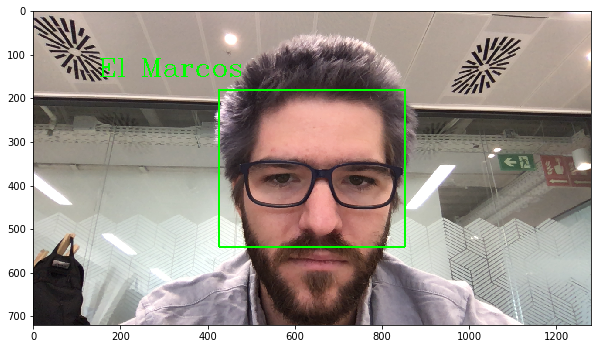

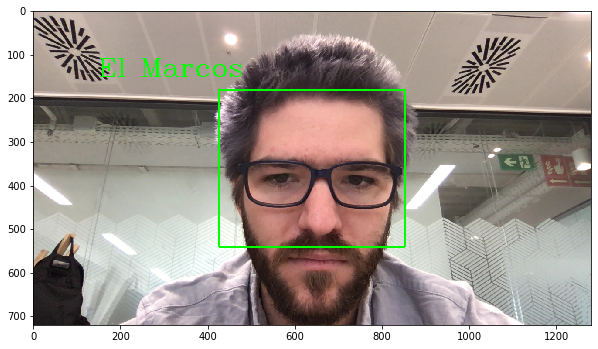

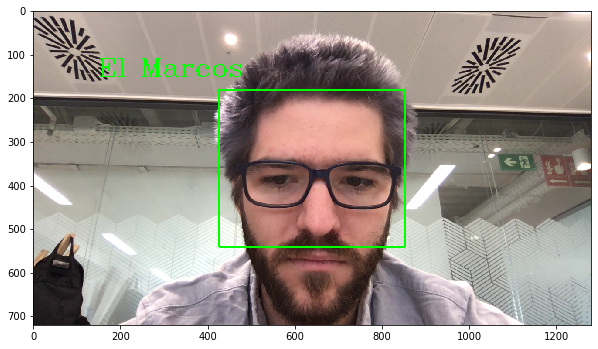

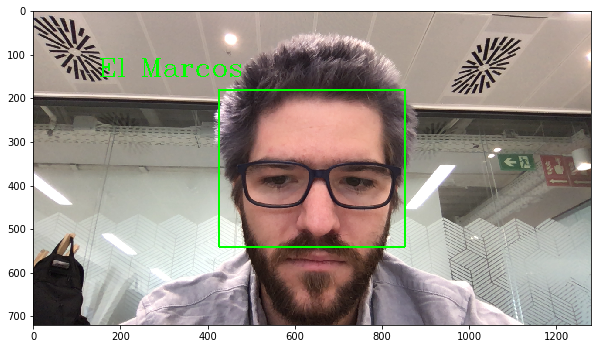

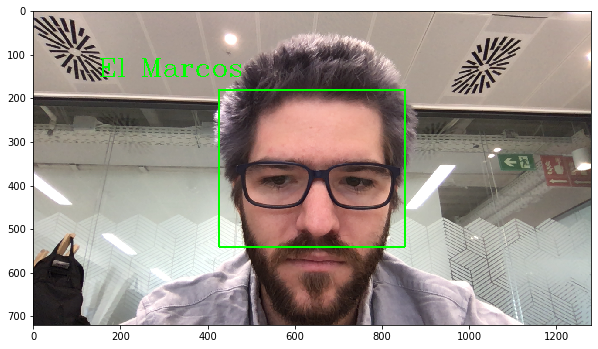

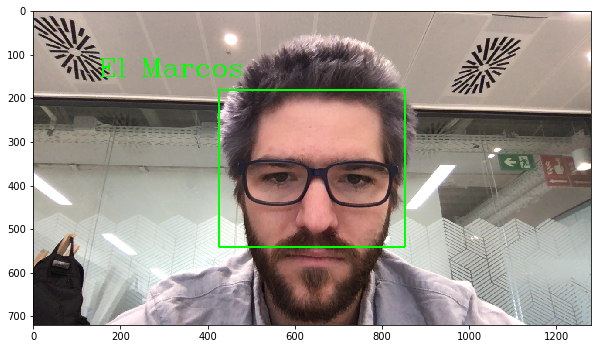

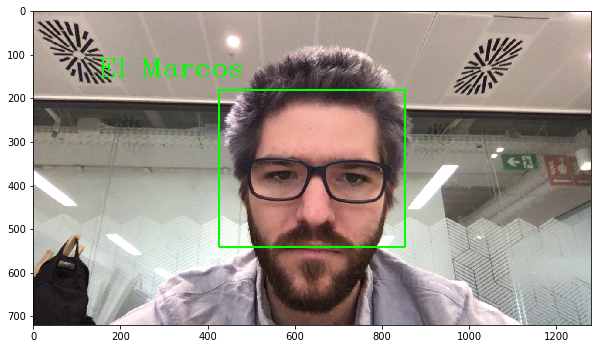

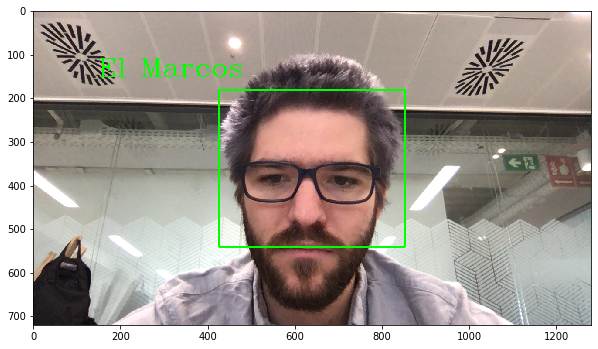

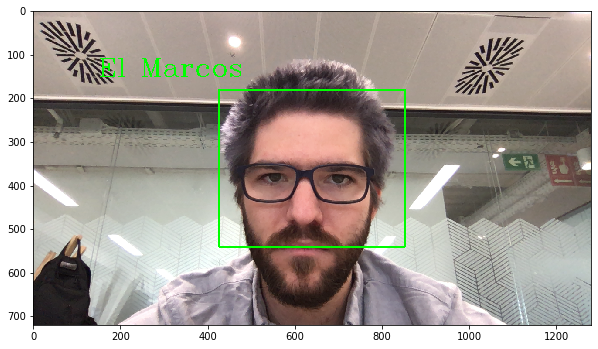

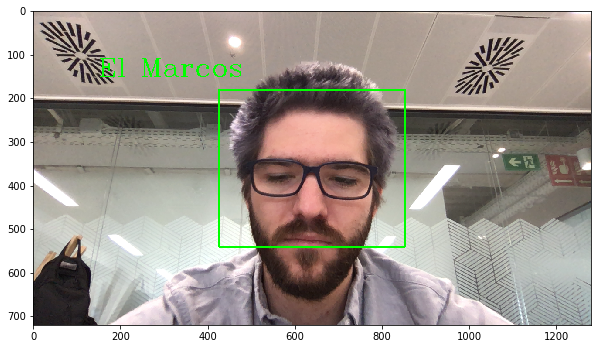

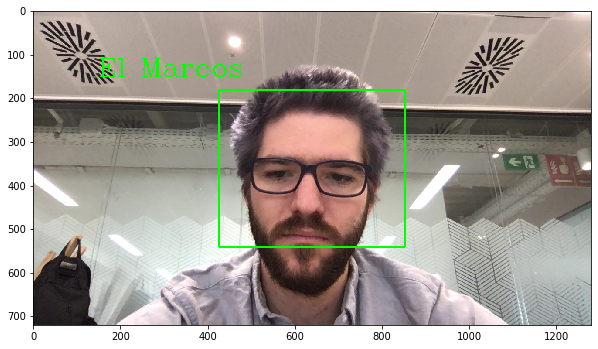

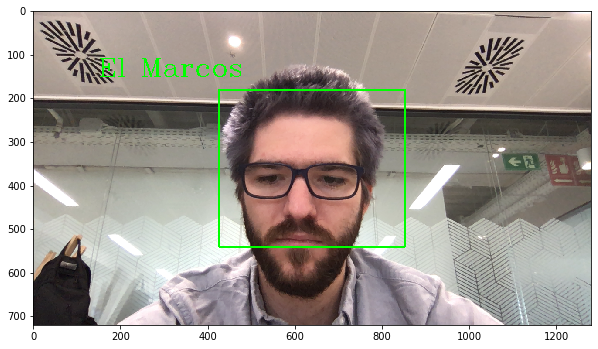

In [ ]:
image_template = []

image_template.append(cv2.imread('img/marcos.jpeg', 0)) 
image_template.append(cv2.imread('img/edgar.png', 0))


cap = cv2.VideoCapture(0)


# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image_template[0],None)


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)




while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]
    
    
    

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
    # Draw rectangular window for our region of interest
    #cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    
    kp2, des2 = sift.detectAndCompute(cropped,None)
    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
   
             
    #print(matches[1][0])
    
    # Apply ratio test
    good = []
    for m,n in matches:
        
        if m.distance < 0.75*n.distance:
            good.append([m])
            
            

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)

 
    

    
    # Get number of ORB matches 
    for i in range(len(image_template)):
        
        
        #matches = ORB_detector(cropped, image_template[i])
    
        # Display status string showing the current no. of matches 
        #output_string = "Matches = " + str(len(matches))
        #cv2.putText(framecopy, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)

        # Our threshold to indicate object deteciton
        # For new images or lightening conditions you may need to experiment a bit     
        threshold = 300

        # If matches exceed our threshold then object has been detected
        if len(matches) > threshold:
            #frame = frame.copy()
            if i == 0:
                text = "El Marcos"
            elif i == 1:
                text = "El Edgar"
                
                
            cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
            cv2.putText(frame,text,(150,150), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2) 
            
            #matches_img = cv2.drawMatchesKnn(image_template[0],kp1,cropped,kp2,matches[:],None)
            img3 = cv2.drawMatchesKnn(image_template[0],kp1,cropped,kp2,img3,good,flags=2)
            cv2.imwrite('orbMatches.jpg',img3)
            
            break
            
    showImg(frame)
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


## Brute-Force Matching with ORB Descriptors

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_template = []

image_template.append(cv2.imread('img/marcos.jpeg', 0)) 
image_template.append(cv2.imread('img/edgar.png', 0))


# Initiate ORB detector
orb = cv2.ORB_create()



In [2]:
cap = cv2.VideoCapture(0)


while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]
    
    

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
    # Draw rectangular window for our region of interest
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    kp2, des2 = orb.detectAndCompute(cropped,None)
    
    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    
    for i in range(len(image_template)):
        
        # find the keypoints and descriptors with ORB
        kp1, des1 = orb.detectAndCompute(image_template[i],None)
        
        # Match descriptors.
        matches = bf.match(des1,des2)

        # Sort them in the order of their distance.
        matches = sorted(matches, key = lambda x:x.distance)

        threshold = 200


        if len(matches) > threshold:
                #frame = frame.copy()
                if i == 0:
                    text = "El Marcos"
                elif i == 1:
                    text = "El Edgar"


                cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
                cv2.putText(frame,text,(150,150), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2) 


                
    #showImg(img3)
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


AttributeError: 'NoneType' object has no attribute 'shape'